### Loan Data and View Distribution of Approval Status 

/var/folders/y6/dr3ghbgj7r5636jwwh64_f900000gn/T/ipykernel_28664/2262110426.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=loan_data, x='LoanApproved', palette='coolwarm')


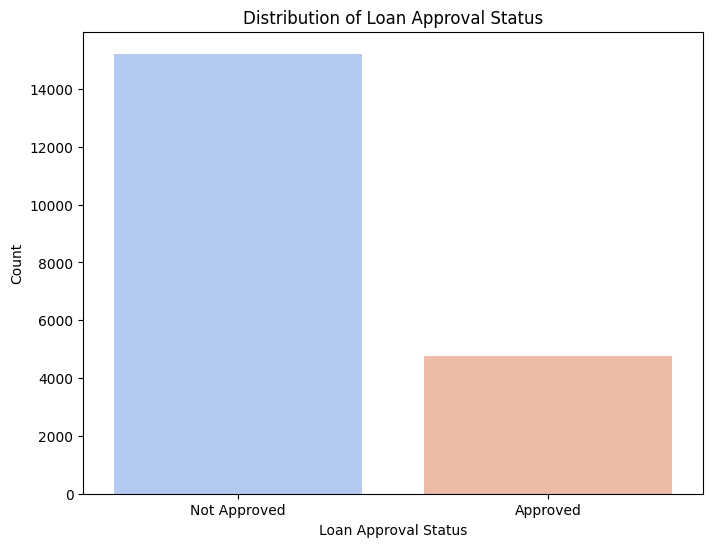

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = 'Loan.csv'
loan_data = pd.read_csv(file_path)
loan_data.head()

plt.figure(figsize=(8, 6))
sns.countplot(data=loan_data, x='LoanApproved', palette='coolwarm')
plt.title("Distribution of Loan Approval Status")
plt.xlabel("Loan Approval Status")
plt.ylabel("Count")
plt.xticks([0, 1], ['Not Approved', 'Approved'])
plt.show()

### Create Correlation Matrix to Gather Features for Model Training

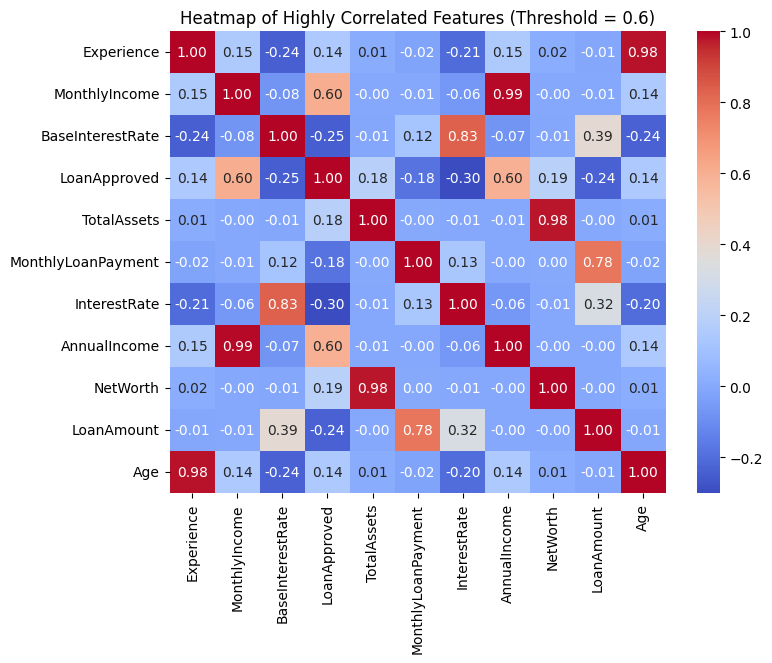

In [30]:
# Select numerical features for correlation
numerical_features = loan_data.select_dtypes(include=['float64', 'int64'])
threshold = 0.6
correlation_matrix = numerical_features.corr()

# Convert the set of high correlation features to a list
high_corr_pairs = (correlation_matrix
                   .unstack()
                   .reset_index()
                   .rename(columns={0: 'correlation', 'level_0': 'feature_1', 'level_1': 'feature_2'}))

# Filter out self-correlations and retain only high correlations
high_corr_pairs = high_corr_pairs[(high_corr_pairs['correlation'] >= threshold) & 
                                  (high_corr_pairs['feature_1'] != high_corr_pairs['feature_2'])]

# Get the unique set of highly correlated features
high_corr_features = set(high_corr_pairs['feature_1']).union(set(high_corr_pairs['feature_2']))
high_corr_features_list = list(high_corr_features)

# Filter the correlation matrix to include only these features
filtered_correlation_matrix = correlation_matrix.loc[high_corr_features_list, high_corr_features_list]

# Plot the smaller heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(filtered_correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Heatmap of Highly Correlated Features (Threshold = 0.6)")
plt.show()


### Feature Correlation with Loan Approval Graph

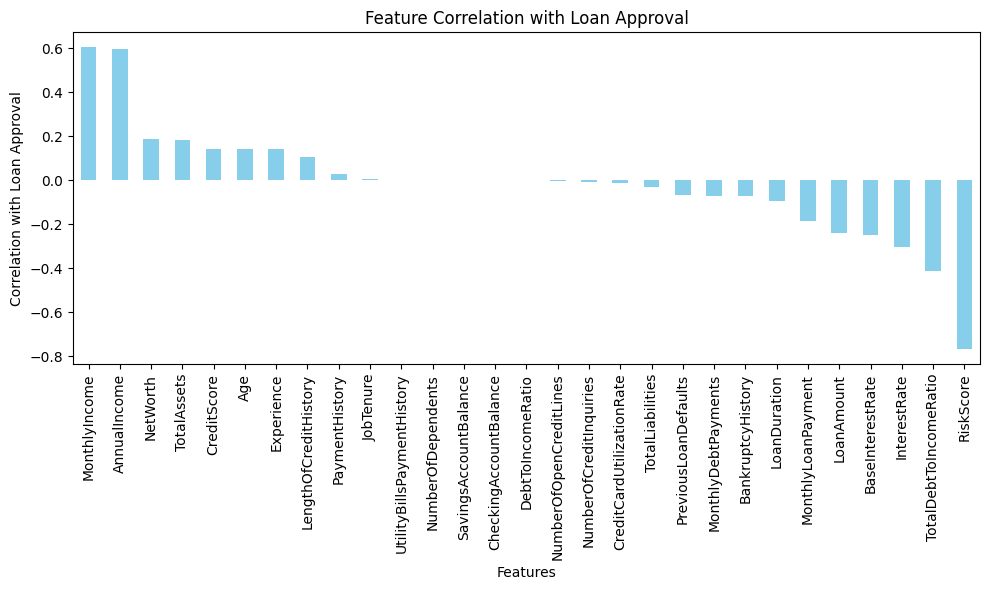

In [31]:
# Calculate the correlation of each feature with the LoanApproved target variable
loan_approval_correlation = correlation_matrix['LoanApproved'].drop('LoanApproved').sort_values(ascending=False)

# Plot the correlations with LoanApproved
plt.figure(figsize=(10, 6))
loan_approval_correlation.plot(kind='bar', color='skyblue')
plt.title("Feature Correlation with Loan Approval")
plt.xlabel("Features")
plt.ylabel("Correlation with Loan Approval")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


### TODO: Experiemnt with Predictor Variables
- We can make new variables by combining some features into an entirely new parameter
- We can run gridsearch or something similar to get the best features 
- Modify `predictor_variables` to do this :-)

In [32]:
from sklearn.model_selection import train_test_split
# Select the most correlated features as predictors and the target variable
target_variable = 'LoanApproved'
predictor_variables = ['MonthlyIncome', 'AnnualIncome', 'NetWorth', 'TotalAssets', 'CreditScore', 'Age', 'Experience', 'LengthOfCreditHistory', 'PaymentHistory', 'TotalDebtToIncomeRatio', 'RiskScore', 'InterestRate', 'BaseInterestRate', 'LoanAmount', 'LoanDuration']
#predictor_variables = high_corr_features_list #MonthlyIncome, AnnualIncome, NetWorth, TotalAssets, CreditScore, Age, Experience, LengthOfCreditHistory, PaymentHistory, TotalDebtIncomeRatio, RiskScore, IntrestRate, BaseIntrestRate, LoanAmount, LoanDuration

# Ensure the target variable is in the dataset and split the data
X = loan_data[predictor_variables]
y = loan_data[target_variable]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Run Different Models and Evaluate Preformance 
1. Random Forrest 
2. Logistic Regression
3. Support Vector Machine 
3. K-Nearest Neighbors
4. Gradient Boosting XGboost

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
report = classification_report(y_test, y_pred, target_names=['Not Approved', 'Approved'])
print(report)


              precision    recall  f1-score   support

Not Approved       0.99      0.99      0.99      2983
    Approved       0.99      0.98      0.98      1017

    accuracy                           0.99      4000
   macro avg       0.99      0.99      0.99      4000
weighted avg       0.99      0.99      0.99      4000



In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Select the most correlated features as predictors and the target variable
target_variable = 'LoanApproved'
#predictor_variables = high_corr_features_list

# Ensure the target variable is in the dataset and split the data
X = loan_data[predictor_variables]
y = loan_data[target_variable]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Logistic Regression
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
report = classification_report(y_test, y_pred, target_names=['Not Approved', 'Approved'])
print(report)

              precision    recall  f1-score   support

Not Approved       0.93      0.96      0.95      2983
    Approved       0.87      0.80      0.83      1017

    accuracy                           0.92      4000
   macro avg       0.90      0.88      0.89      4000
weighted avg       0.92      0.92      0.92      4000



/Users/marianellasalinas/Cornell/Applied Machine Learning/Loan-Approval-Risk-Project/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
from sklearn.svm import SVC

# Train a Support Vector Machine
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model's performance
svm_report = classification_report(y_test, y_pred_svm, target_names=['Not Approved', 'Approved'])
print(svm_report)

              precision    recall  f1-score   support

Not Approved       0.89      0.96      0.92      2983
    Approved       0.83      0.64      0.72      1017

    accuracy                           0.88      4000
   macro avg       0.86      0.80      0.82      4000
weighted avg       0.87      0.88      0.87      4000



              precision    recall  f1-score   support

Not Approved       0.89      0.93      0.91      2983
    Approved       0.75      0.66      0.71      1017

    accuracy                           0.86      4000
   macro avg       0.82      0.79      0.81      4000
weighted avg       0.86      0.86      0.86      4000



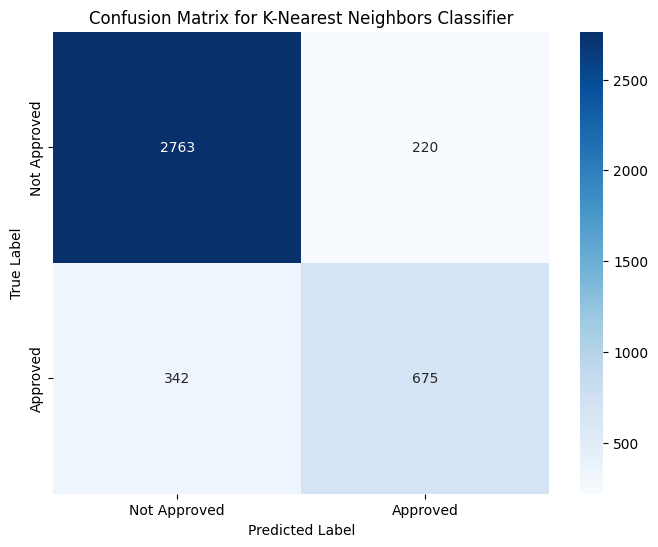

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

# Train a K-Nearest Neighbors Classifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model's performance
knn_report = classification_report(y_test, y_pred_knn, target_names=['Not Approved', 'Approved'])
print(knn_report)

conf_matrix = confusion_matrix(y_test, y_pred_knn)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Approved', 'Approved'], yticklabels=['Not Approved', 'Approved'])
plt.title("Confusion Matrix for K-Nearest Neighbors Classifier")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [29]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Train a Gradient Boosting Classifier using XGBoost
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model's performance
xgb_report = classification_report(y_test, y_pred_xgb, target_names=['Not Approved', 'Approved'])
print(xgb_report)

              precision    recall  f1-score   support

Not Approved       1.00      1.00      1.00      2983
    Approved       0.99      0.99      0.99      1017

    accuracy                           1.00      4000
   macro avg       0.99      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000

